# Определение критериев влияющих на успешность видео игр

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й.

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Основная цель проекта** - на основе инсайтов за прошлые годы, выявить закономерности определяющие успешность видео игр. 

## Изучение данных

In [1]:
# импортируем все необходимые библиотеки для проекта
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
from IPython.display import display
from functools import reduce

import warnings
warnings.filterwarnings("ignore")

In [2]:
# зададим темный стиль оформления background для всех следующих графиков
sns.set_theme(style="darkgrid")

#расширяем максимальное кол-во столбцов для вывода на экран
pd.options.display.max_columns = 30

In [3]:
df = pd.read_csv('datasets/games.csv')

In [4]:
display(df.head(5))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
print(df.isna().any())

Name                True
Platform           False
Year_of_Release     True
Genre               True
NA_sales           False
EU_sales           False
JP_sales           False
Other_sales        False
Critic_Score        True
User_Score          True
Rating              True
dtype: bool


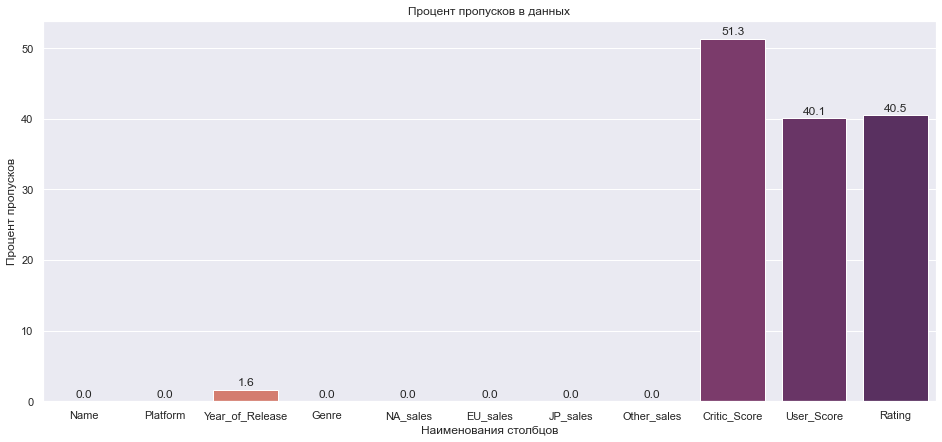

In [7]:
# зададим размер области построения графика
plt.figure(figsize=(16, 7))

nan_relation_bar = (
    sns
    .barplot(
        data=(
            df.isnull().sum() * 100 / len(df)
        ).reset_index(),
        x='index',
        y=0,
        palette="flare"
    )
)
nan_relation_bar.set(
    title = 'Процент пропусков в данных', 
    xlabel = 'Наименования столбцов', 
    ylabel = 'Процент пропусков'
)

for p in nan_relation_bar.patches:
    nan_relation_bar.annotate(
        format(p.get_height(), '.1f'), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='center', 
        xytext=(0, 7), 
        textcoords='offset points'
    )

plt.show()

**Вывод**

Заменить тип данных:
- Year_of_Release на int
- User_Score на float

С пропусками разберемся далее

## Предобработка данных

### Обработка наименований столбцов

Приведем все наименования к нижнему регистру

In [8]:
df.rename(str.lower, axis='columns', inplace=True)

display(df.head(1))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


### Замена типа данных

При первой попытке изменить тип данных у столбца user_score, поличили ошибку, так как в столбце присутствует строковое значение "tbd" что можно перевести как "подлежит уточнению". Заменим данное значение на NaN

In [9]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan

print(df['user_score'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' '8.8' '6.9' '9.4'
 '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7' '4.1'
 '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3' '4.7'
 '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8' '1.8'
 '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2' '2.3'
 '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


In [10]:
# Заменим тип данных у стобцов year_of_release и user_score
df = df.astype({'year_of_release': 'Int64', 'user_score': 'float64'})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


### Обработка пропусков

Посчитаем кол-во строк в датасете с пустыми значениями

In [11]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Имеется 2 строки с пустым наименованием игры и жанром. Посмотрим на них

In [12]:
display(df[df['name'].isnull()].head(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Записи с пустым названием и жанром одни и те же, удалим их. 2 строчки не повлияют на итоговый результат и в любом случаем восстановить эти пропуски не получится.

In [13]:
df.drop(df[df['name'].isnull()].index, inplace=True)

Остальные пропуски, кроме рейтинга, попробуем заменить по следующему принципу. Очень часто игра выходит на все игровые платформы одновременно. Да и оценки пользователей не должены сильно отличаться. Ведь сюжет и геймплей одинаковый, разница лишь где ты играешь (ПК, консоль или что то еще). Для игр с пустыми значениями найдем записи на других платформах по наименованию и заполним пропуски. Напишем для этого функцию

In [14]:
def replacement_nan_values(row, column_name):
    # составим массив из годов релиза на других платформах
    year_list = set(
        df[(df['name'] == row['name']) & (df[column_name].notnull())][column_name]
    )
    
    # проверим что массив создался, убираем из него все nan значения и берем первый элемент из списка
    if year_list:
        year = [x for x in year_list if x != 'nan'][0]
        
        df.loc[df['name'] == row['name'], column_name] = year

Вызываем нашу функцию

In [15]:
# в nan_columns запишем наименование всех столбцов в которых встречаются NaN значения, кроме столбца Rating
nan_columns = df.columns[(df.isnull().any()) & (df.columns != 'rating')].tolist()

# проходимся циклом по названиям столбцов и вызываем нашу функцию, передавая в нее название столбца и нужно строку
for value in nan_columns:
    df[df[value].isnull()].apply(replacement_nan_values, args=(value, ), axis=1)

Повторно посчитаем кол-во строк с пустым значением в столбце year_of_release

In [16]:
df.isna().sum()

name                  0
platform              0
year_of_release     146
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       7615
user_score         8024
rating             6764
dtype: int64

Нам удалось восстановить год релиза для 123 записей. Оценку критиков для 963 записей. Оценку пользователей для 1101 записи. Думаю это хороший результат!

В рамках нажего исследования, нам важно знать год релиза. Удалим записи с пропусками в этом столбце

In [17]:
df.dropna(subset=['year_of_release'], inplace=True)

In [18]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       7532
user_score         7928
rating             6699
dtype: int64

### Суммарные продажи во всех регионах

Посчитаем суммарные продажи и запишем этот показатель в отдельный столбец

In [19]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [20]:
display(df.head(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


**Вывод**

Все что было возможно заполнить - мы заполнили. Есть еще вариант распарсить сайт metacritic, но к сожалению на это нет времени. В нашем датасете попрежнему осталось много nan значений в оценках и рейтинге, будем работать с тем что имеем.

## Анализ данных

### Сколько игр выпускалось в разные годы

Создадим функцию для создания сводной таблицы и агрегации данных, возможно она нам еще понадобится

In [21]:
def group_df(df_name, list_index, value, agfunc, reset_status):
    grouped_df = pd.pivot_table(
        df_name,
        index=list_index,
        values=value,
        aggfunc=agfunc
    )
    
    if reset_status == 'reset':
        grouped_df = grouped_df.reset_index()
        
    
    return grouped_df

Вызывем нашу функцию и получим кол-во игр по годам

In [22]:
game_by_year_of_release = group_df(df, ['year_of_release'], 'name', 'count', 'reset')

Построим визуализацию по получившимся значениям

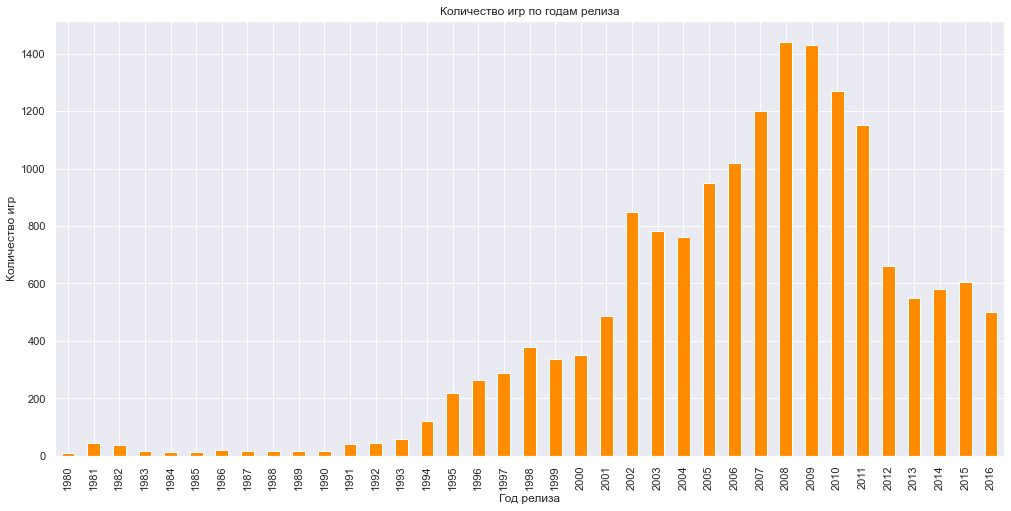

In [23]:
game_by_year_of_release.plot(
    x='year_of_release',
    y='name',
    figsize=(17, 8),
    kind='bar',
    title='Количество игр по годам релиза',
    color='darkorange',
    legend=False
).set(
    xlabel = 'Год релиза', 
    ylabel = 'Количество игр'
)
    
plt.show()

**Вывод**

На данном графике очень хорошо виден сильный рост в индустрии видео игр с 1994 года. Важны ли данные за все периоды? На наш взгляд нет, так как сфера очень стремительно развивается. Вполне достаточно информации за последние 5 лет, а то и меньше. Но пока поработаем со всеми значениями.

### Как менялись продажи по платформам

In [24]:
sales_by_platform = group_df(df, 'platform', 'total_sales', 'sum', '').sort_values('total_sales', ascending=False)

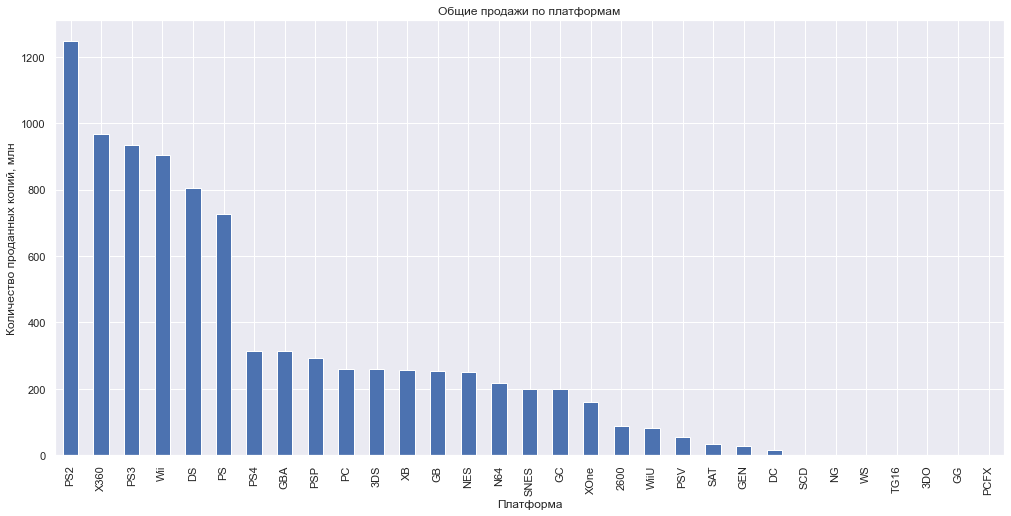

In [25]:
sales_by_platform.plot(
    kind='bar',
    y='total_sales',
    title='Общие продажи по платформам',
    figsize=(17, 8),
    legend=False
).set(
    xlabel = 'Платформа', 
    ylabel = 'Количество проданных копий, млн'
)

plt.show()

Хорошо видны лидеры по продажам. Но для наглядности возьмем топ 20 платформ.

In [26]:
sales_by_platform_top_20 = sales_by_platform.head(20)

Построим для нашего топа, график распределения по годам, что бы опредилить жизненный цикл, актуальность платформы и пик продаж.

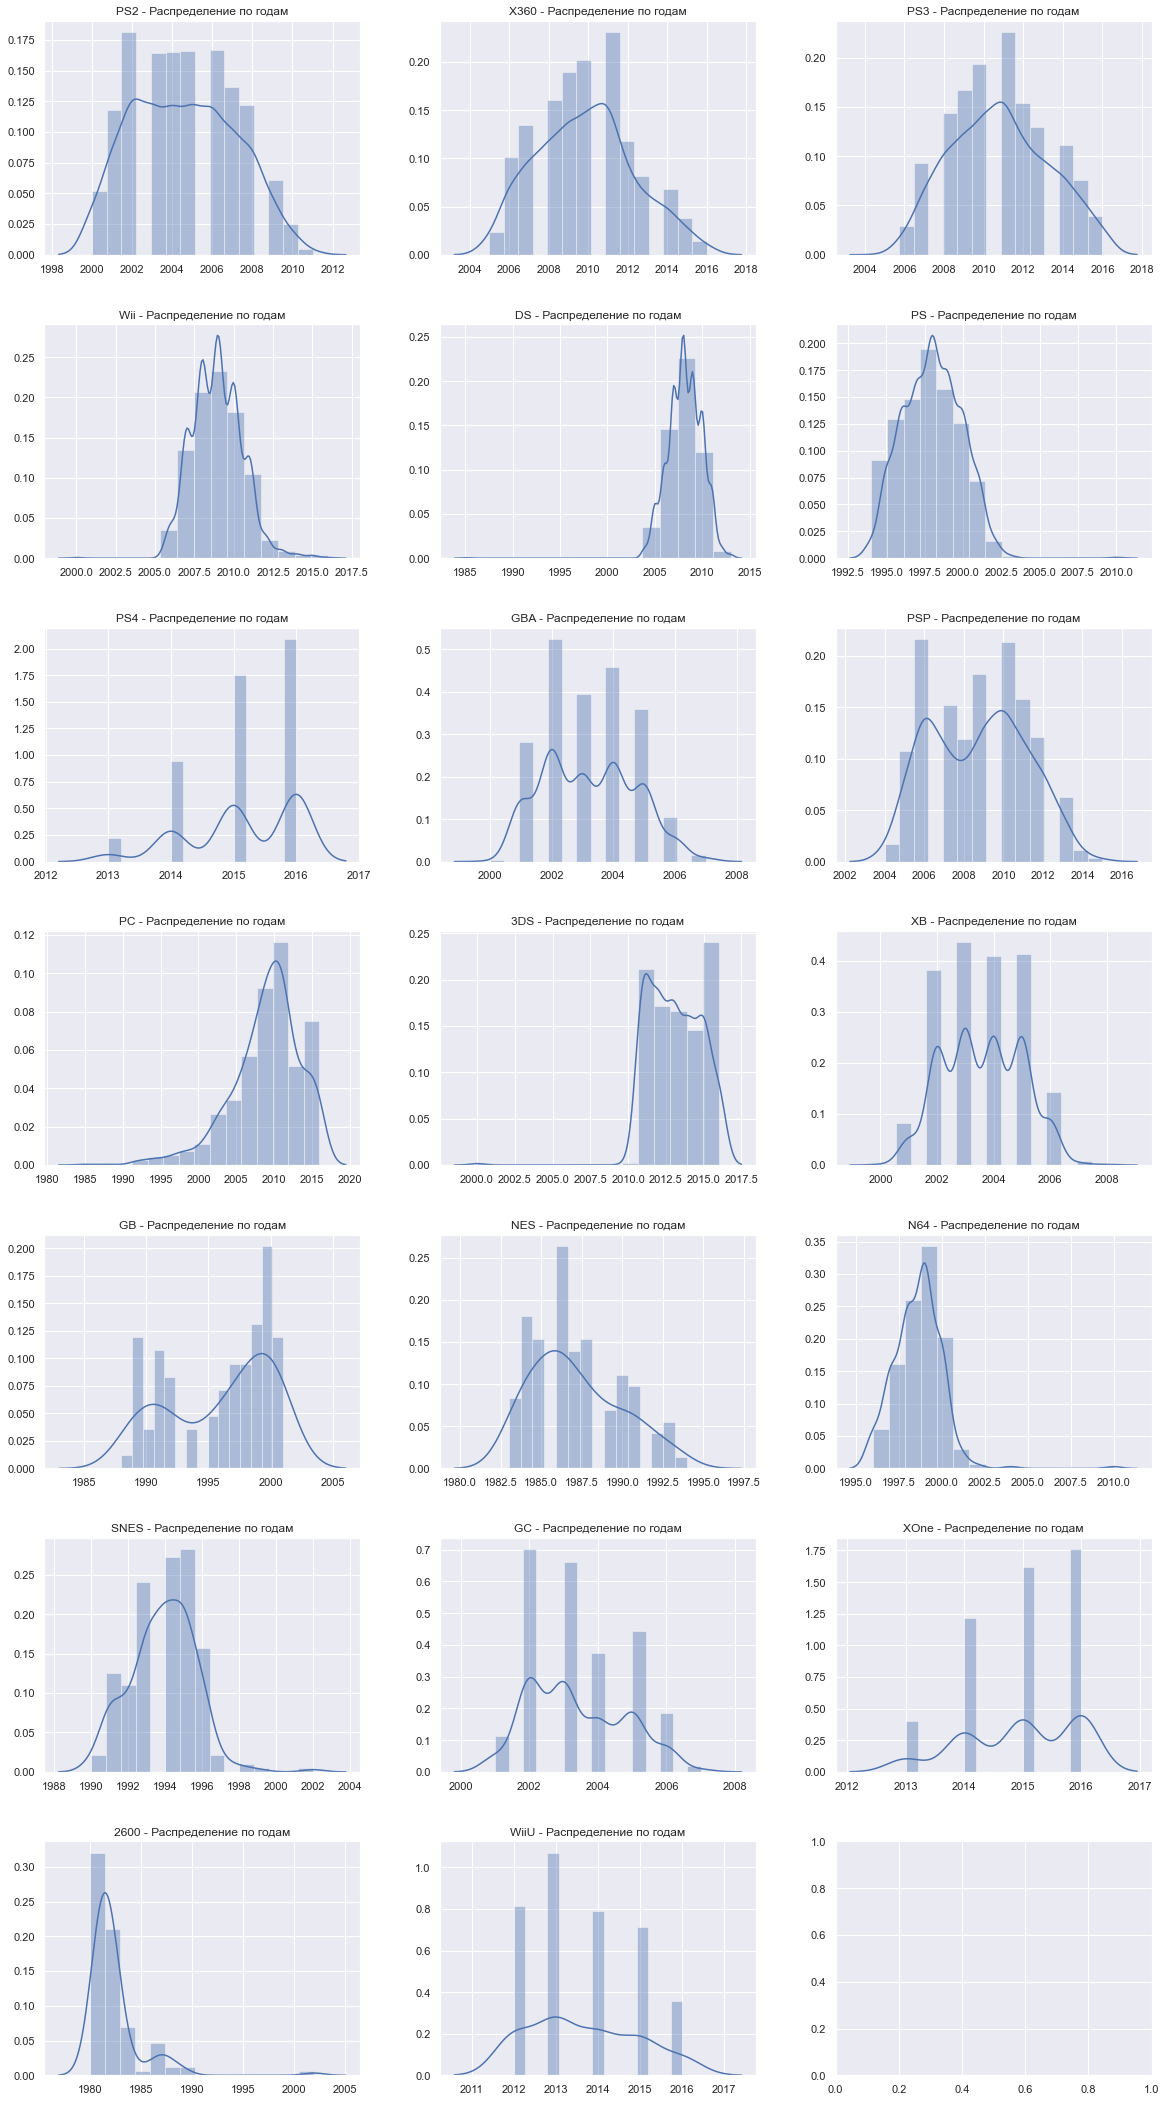

In [27]:
fig, ax = plt.subplots(7,3, figsize=(17,30))
i = 0
j = 0

for platform in list(sales_by_platform_top_20.index):
    if j > 2:
        i = i + 1
        j = 0
        
    sns.distplot(
        df[df['platform'] == platform]['year_of_release'],
        kde=True,
        bins=15,
        ax= ax[i][j]
    )
    
    ax[i][j].set(
        title=platform + ' - Распределение по годам',
        xlabel='',
        ylabel=''
    )
    j = j + 1
    
    
fig.tight_layout(pad=3.0)
plt.show()

**Вывод**

Из графиков видно что в среднем платформа живет около 10 лет. На текущий момент можно выделить актуальные платформы - PS4, 3DS, PC, XOne. Добавим их в список для дальнейшей работы.

### Какие платформы лидируют по продажам, растут или падают?

In [28]:
actual_platform_list = ['PS4', '3DS', 'PC', 'XOne']

Функция создания сводной таблицы для каждой платформы

In [29]:
def sales_by_year_and_platform(name):
    result = df[(df['platform'] == name) & (df['year_of_release'] >= 2012)].pivot_table(
        index='year_of_release',
        values='total_sales',
        aggfunc='sum'
    ).sort_values(
        'year_of_release',
        ascending=False
    )
    
    return result

Используя нашу функцию, пройдемся циклом по отобранным заранее 4 платформам и возьмем данные начиная с 2012 года. Построим для них графики с динамикой продаж.

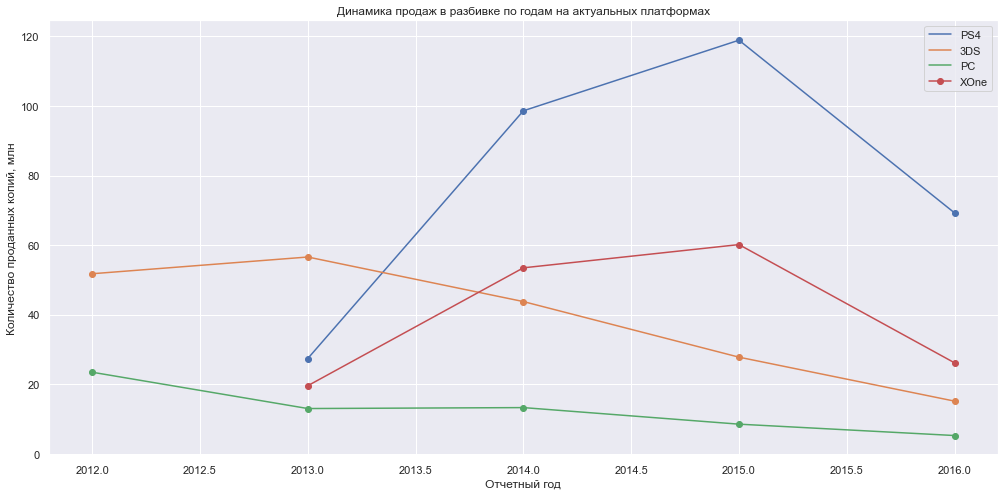

In [30]:
axes = plt.gca()

for platform in actual_platform_list:
    sales_by_year_and_platform(platform).plot(
        kind='line',
        y='total_sales',
        title='Динамика продаж в разбивке по годам на актуальных платформах',
        figsize=(17, 8),
        marker='o',
        label=platform,
        ax=axes
    ).set(
        xlabel = 'Отчетный год', 
        ylabel = 'Количество проданных копий, млн'
    )
    
plt.show()

**Вывод**

Скорее всего мы имеем не полные данные по прадажам за 2016 год, так как у всех свежих платформ наблюдается спад. Так что будем принимать во внимание значения до 2016 года. Явный лидер - PS4. 3DS и XOne примерно в одинаковом положении, однако у 3DS виден явный спад с 2013 года. А у XOne рост. Рынок PC игр можно назвать стабильным, но не особо прибыльным. 

### «Ящик с усами» по глобальным продажам игр в разбивке по платформам

Отфильтруем наш датафрейм по актуальным платформам с 2012 года и сохраним в новую переменную

In [31]:
df_actual_platform = df[(df['platform'].isin(actual_platform_list)) & (df['year_of_release'] >= 2012)].sort_values('platform', ascending=False)

Посчитаем общие продажи по годам в разрезе платформ.

In [32]:
df_actual_platform_sales_by_year = group_df(df_actual_platform, ['platform', 'year_of_release'], 'total_sales', 'sum', 'reset').sort_values('platform', ascending=False)

Посчитаем среднее значение продаж и медиану для актуальных платформ, округлим результаты до тысячных.

In [33]:
df_actual_platform_avg_by_year = np.round(group_df(df_actual_platform_sales_by_year, ['platform'], 'total_sales', ('mean', 'median'), ''), 2).sort_values('platform', ascending=False)

Выведем результат на график

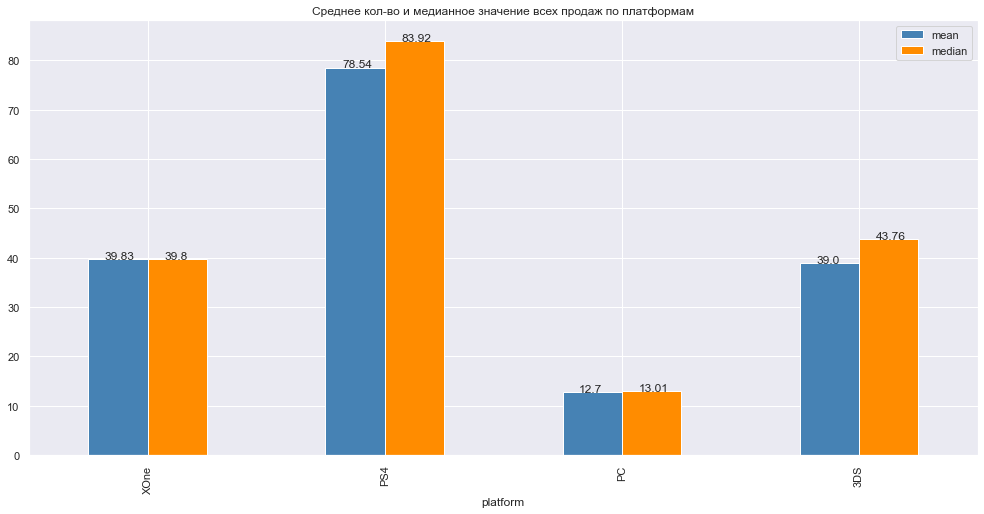

In [34]:
value_grouped = df_actual_platform_avg_by_year.plot( 
    kind='bar',
    title='Среднее кол-во и медианное значение всех продаж по платформам',
    figsize=(17,8),
    color=['steelblue', 'darkorange']
)

for p in value_grouped.patches:
    value_grouped.annotate(float(p.get_height()), (p.get_x() + 0.07, p.get_height()))

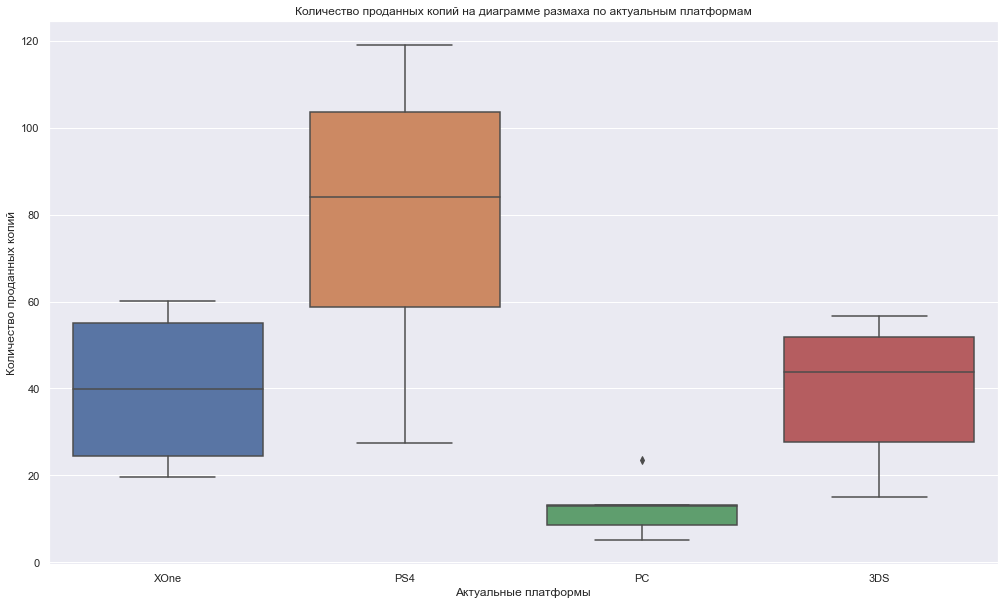

In [35]:
plt.subplots(figsize=(17,10))
sns.boxplot(
    data=df_actual_platform_sales_by_year,
    x='platform',
    y='total_sales'
).set(
    title='Количество проданных копий на диаграмме размаха по актуальным платформам',
    xlabel='Актуальные платформы', 
    ylabel='Количество проданных копий'
)

plt.show()

**Вывод**

По диаграммам размаха еще больше видно приемущество PS4 над остальными актуальными платформами. Медиана во всех случаях, кроме PC, близка к среднему значению, значит мы имеем давольно чистые данные, без критичных аномалий и вбросов.

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

Выше мы смогли определить наиболее перспективные платформы для планирования рекламной кампании. Это PS4, XOne, PC и 3DS. Так же начнем рассматривать более свежие данные с 2012 года. 

In [36]:
mvp_platform_list = ['PS4', 'XOne', 'PC']

df_mvp_platform = df[(df['platform'].isin(mvp_platform_list)) & (df['year_of_release'] >= 2012)]

In [37]:
display(df_mvp_platform.head(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,81.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,81.0,5.7,M,7.66


Составим список с исследуемыми столбцами

In [38]:
corr_list = ['user_score', 'critic_score', 'total_sales']

Выведем корреляцию по отобранным платформам в виде таблиц и графиков


PS4 - корреляция общих продаж с оценками пользователей и критиков


,user_score,critic_score,total_sales
user_score,1.000000,0.450617,-0.032828
critic_score,0.450617,1.000000,0.380613
total_sales,-0.032828,0.380613,1.000000



XOne - корреляция общих продаж с оценками пользователей и критиков


,user_score,critic_score,total_sales
user_score,1.000000,0.360118,-0.089604
critic_score,0.360118,1.000000,0.372176
total_sales,-0.089604,0.372176,1.000000



PC - корреляция общих продаж с оценками пользователей и критиков


,user_score,critic_score,total_sales
user_score,1.000000,0.359645,-0.112193
critic_score,0.359645,1.000000,0.241375
total_sales,-0.112193,0.241375,1.000000


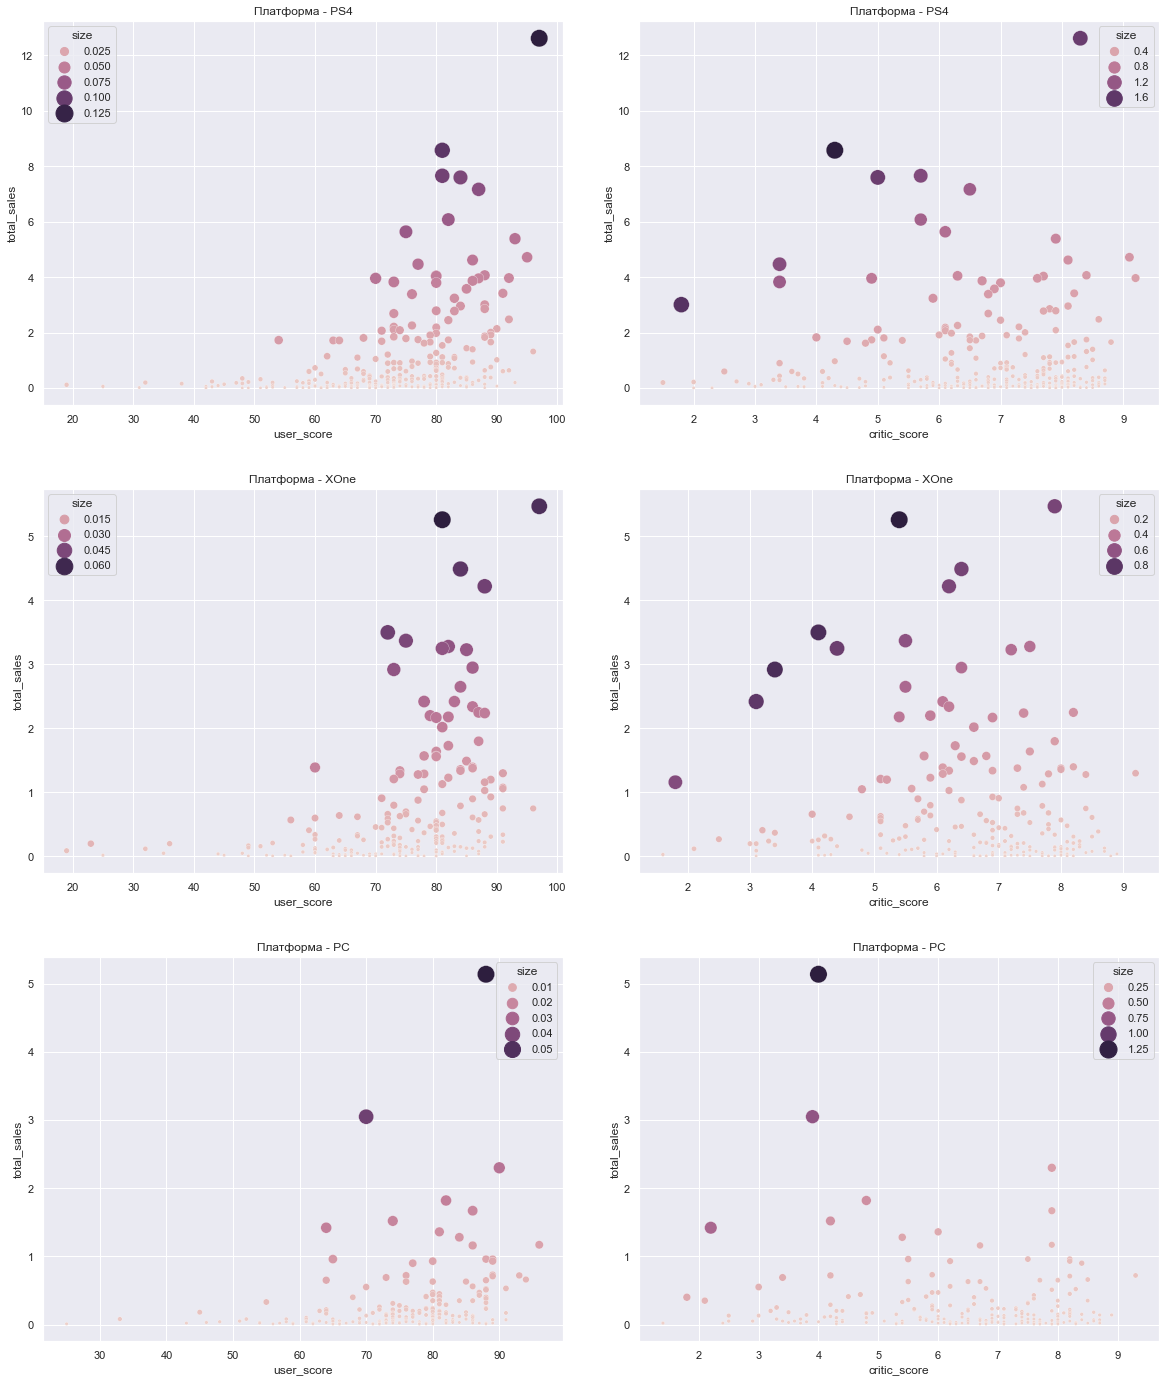

In [39]:
fig, ax = plt.subplots(3,2, figsize=(17,20))

for i, platform in enumerate(mvp_platform_list):
    df_mvp_platform_filter = df_mvp_platform.query('platform == @platform')
    
    print()
    print(platform + ' - корреляция общих продаж с оценками пользователей и критиков')
    display(df_mvp_platform.query('platform == @platform')[corr_list].corr())
    
    for j, corr in enumerate(corr_list[0:2]):
        if j == 0:         
            tip_rate = df_mvp_platform_filter.eval('total_sales / critic_score').rename('size')
            indicator = 'critic_score'

        else:
            tip_rate = df_mvp_platform_filter.eval('total_sales / user_score').rename('size')
            indicator = 'user_score'

        sns.scatterplot(
            data=df_mvp_platform_filter,
            x=indicator,
            y='total_sales',
            hue=tip_rate,
            size=tip_rate,
            sizes=(10, 300),
            ax= ax[i][j]
        )

        ax[i][j].set(
            title='Платформа - ' + platform,
            xlabel=corr,
            ylabel='total_sales'
        )
    
fig.tight_layout(pad=3.0)
plt.show() 

**Вывод**

На всех платформах явно видна связь между продажи и оценками пользователей, а вот к критикам судя по всему прислушиваются намного меньше. Возможно всем надоели проплаченные блогеры)

### Распределение игр по жанрам

In [40]:
df_mvp_platform_genre = group_df(df_mvp_platform, 'genre', 'total_sales', 'sum', '').sort_values('total_sales', ascending=False)

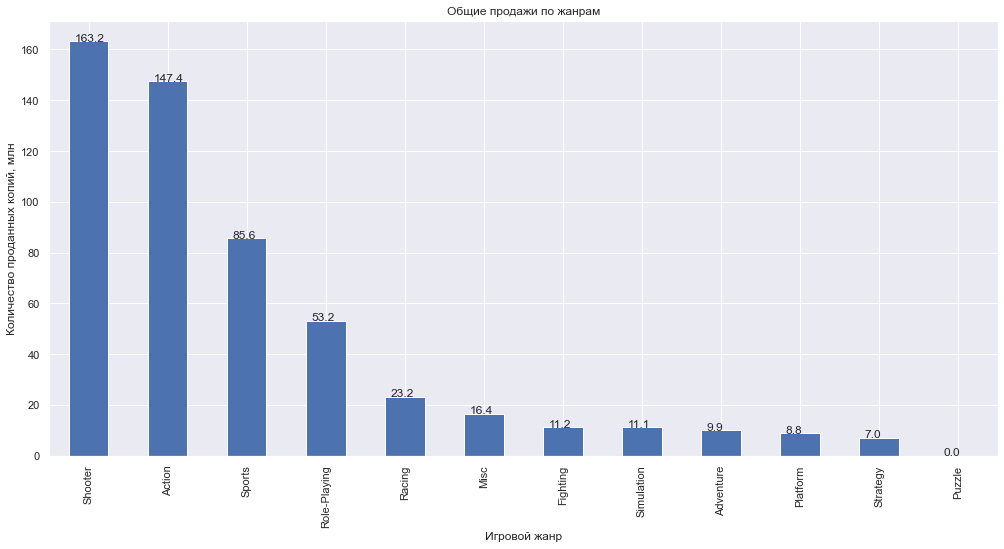

In [41]:
genre_grouped = np.round(df_mvp_platform_genre, 1).plot(
    kind='bar',
    y='total_sales',
    title='Общие продажи по жанрам',
    figsize=(17, 8),
    legend=False
)

genre_grouped.set(
    xlabel = 'Игровой жанр', 
    ylabel = 'Количество проданных копий, млн'
)

for p in genre_grouped.patches:
    genre_grouped.annotate(float(p.get_height()), (p.get_x() + 0.07, p.get_height()))

plt.show()

**Вывод**

Если верит нашим исследованиям, на текущий момент самыми популярными игровыми жанрами у пользователей являются Shooter, Action, Sport и Role-Playing. Хуже всего продаются Puzzle.



## Портрет пользователя каждого региона

Составим список с регионами

In [42]:
region_list = ['na_sales', 'eu_sales', 'jp_sales']

Создадим функцию для агрегации по нужному показателю и выводу топ 5 значений

In [43]:
def top_5_indicators_by_region(region, indicator):
    return group_df(
        df[df['year_of_release'] >= 2012],
        indicator,
        region,
        'sum',
        'reset'
    ).sort_values(
        region,
        ascending=False
    ).head(5)

Функция для генерации графиков вида pieplot и barplot для наглядного сравнения выбранного показателя

In [44]:
def create_pieplot_barplor(df_query, region, indicator, i):
    df_mvp_platform_region.plot(
        kind='pie',
        y=region,
        autopct="%.1f%%",
        textprops={'color':'w', 'weight':'bold'},
        title='Регион - ' + region,
        legend=False,
        ax=ax1[i]
    ).set(
        ylabel = ''
    )
    
    sns.barplot(
        data=df_mvp_platform_region,
        x=indicator,
        y=region,
        ax=ax2[i]
    ).set(
        xlabel = '', 
        ylabel = ''
    )

### Самые популярные платформы (топ-5) в регионах NA, EU и JP

Мы уже выяснили что картина за прошлые периоды нам не совсем интересна. Так же выяснили, что 3 года назад вышли новыве платформы котороые набирают популярность. За отправную точку возьмем данные начиная с 2010 года, это чуть раньше выхода новых платформ. Так как не все пользьватели могли купить еще новую приставку.

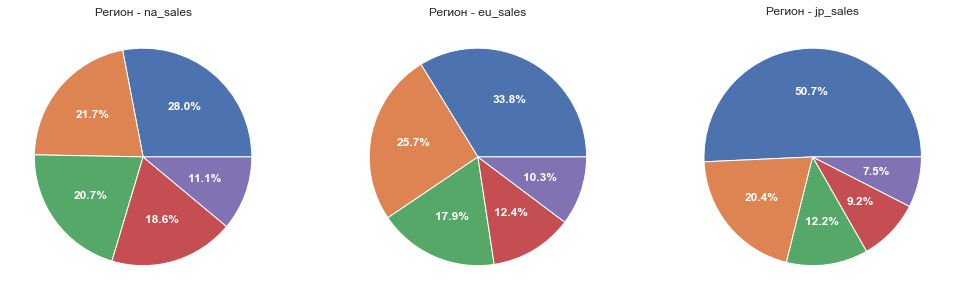

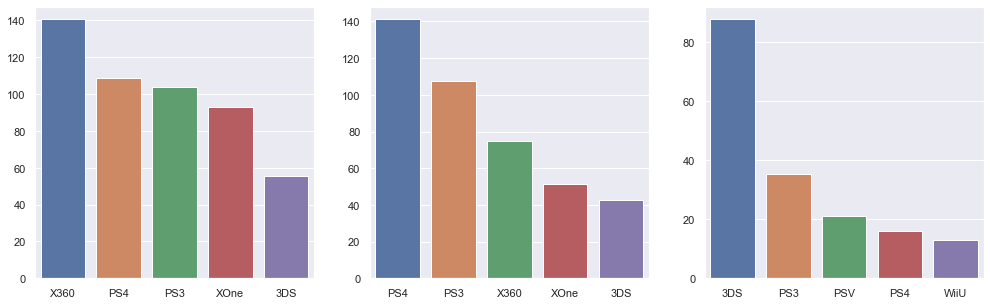

In [45]:
fig, ax1 = plt.subplots(1, 3, figsize=(17,5))
fig, ax2 = plt.subplots(1, 3, figsize=(17,5))

for i, region in enumerate(region_list):
    df_mvp_platform_region = top_5_indicators_by_region(region, 'platform')

    create_pieplot_barplor(df_mvp_platform_region, region, 'platform', i)

plt.show()

**Вывод**

- North America (na_sales) - в Северной Америке до сих пор в топе предыдущее поколение консолей. Xbox 360 от Microsoft лидирует по продажам. А вот дальше примерно одинаковые позиции у PS4, PS3 и XOne. 

- Europe (eu_sales) - В Европе все ровно наоборот. Sony лидирует со своей PS4, а PS3 догоняет. Доля 3DS почти такая же как и в Северной Америке.

- Japan (jp_sales) - Япония другой мир. Тут у пользователей координально отличаются интересы. 3DS в лидерах. Рынок делят между собой домашние компании Sony и Nintendo.

В целом видно что в Северной Америке продажи выше чем в других регионах! 

### Самые популярные жанры (топ-5) в регионах NA, EU и JP

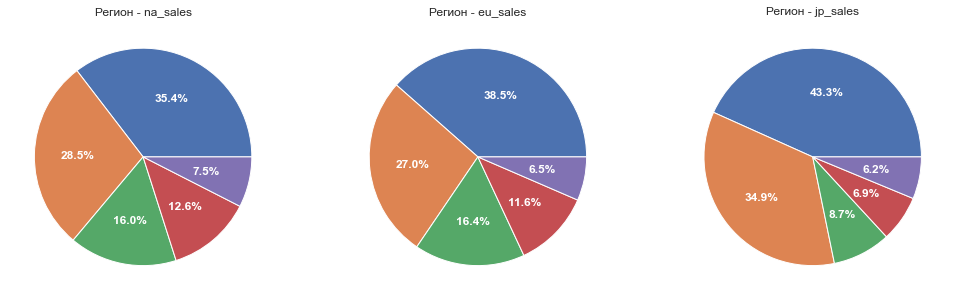

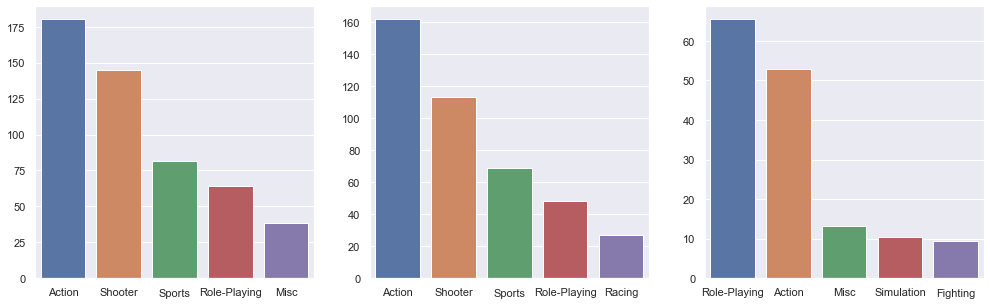

In [46]:
fig, ax1 = plt.subplots(1, 3, figsize=(17,5))
fig, ax2 = plt.subplots(1, 3, figsize=(17,5))

for i, region in enumerate(region_list):
    df_mvp_platform_region = top_5_indicators_by_region(region, 'genre')

    create_pieplot_barplor(df_mvp_platform_region, region, 'genre', i)

    
plt.show()

**Вывод**

- North America (na_sales) - в Северной Америке очень популярны жанры Action и Shooter, на них приходится более 50% продаж.
- Europe (eu_sales) - все тоже самое что и в Северной Америке.
- Japan (jp_sales) - в Японии лвиную долю забирает жанр Role-Playing. Action на втором месте, но по доле рынка он сравним с другими регионами.

### Влияние рейтинга ESRB на продажи в отдельном регионе

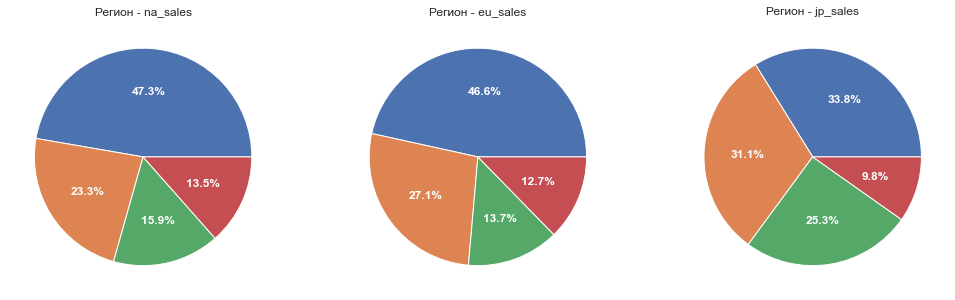

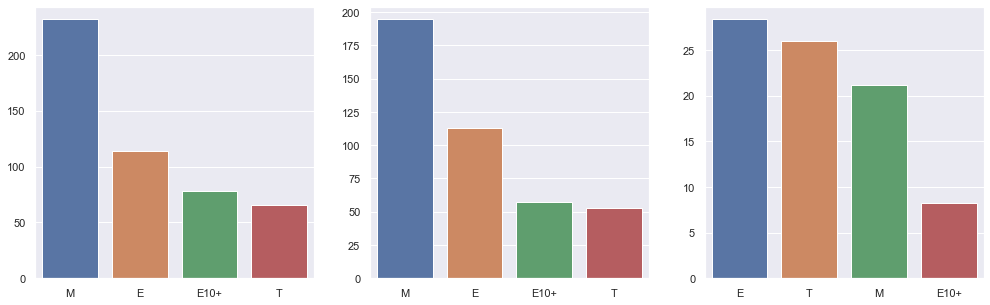

In [47]:
fig, ax1 = plt.subplots(1, 3, figsize=(17,5))
fig, ax2 = plt.subplots(1, 3, figsize=(17,5))

for i, region in enumerate(region_list):
    df_mvp_platform_region = top_5_indicators_by_region(region, 'rating')

    create_pieplot_barplor(df_mvp_platform_region, region, 'rating', i)

    
plt.show()

**Вывод**

Рейтинг влияет на продажи. Отчетливо видны наиболее популярные категории.

- North America (na_sales) - в Северной Америке очень популярны игры с рейтингом M - Для взрослых и E — Для всех.
- Europe (eu_sales) - все тоже самое что и в Северной Америке. Вообще эти регионы во многом похожи.
- Japan (jp_sales) - в Японии популярны игры с рейтингом E — Для всех и T — Подростки.

В целом можно смело сказать что для Северной Америки и Европы можно выбирать схожие стратегии по развитию рекламной кампании. А вот с Японцами нужен отдельный подход.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Нулевая гипотеза** - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Альтернативная гипотеза** - Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [48]:
from scipy import stats as st
   
sample_xone = df_mvp_platform.query('platform == "XOne"')['user_score'].dropna()
sample_pc = df_mvp_platform.query('platform == "PC"')['user_score'].dropna()

alpha = 0.05

results = st.ttest_ind(sample_xone, sample_pc, equal_var = False)

print('p-значение:', results.pvalue)
print()

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
    
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.4536631090215011

Не получилось отвергнуть нулевую гипотезу


### Средние пользовательские рейтинги жанров Action и Sports разные

**Нулевая гипотеза** - Средние пользовательские рейтинги жанров Action и Sports одинаковые

**Альтернативная гипотеза** - Средние пользовательские рейтинги жанров Action и Sports различаются

In [49]:
sample_action = df_mvp_platform.query('genre == "Action"')['user_score'].dropna()
sample_sport = df_mvp_platform.query('genre == "Sports"')['user_score'].dropna()

alpha = 0.05

results = st.ttest_ind(sample_action, sample_sport, equal_var = False)

print('p-значение:', results.pvalue)
print()

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
    
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.1466837204595754e-09

Отвергаем нулевую гипотезу


## Общий вывод

Для планирования рекламной кампании на 2017 год, нужно принимать во внимание следующие аспекты:

- Как показывает прошлый опыт, жизненый цикл платформ в среднем состовляет 10 лет. Cейчас начинается эра таких платформ как PS4 и Xbox One, возможно стоит сделать ставку на них;
- Япония это отдельный мир со своими особенностями. Спросом пользуются Nintendo 3DS, PS3 и портативные консоли. Популярные жанры Action, Role Playing с возростным рейтингом E — Для всех и T — Подростки;
- В Европе и Америке до сих пор пользуются спросом платформы предыдущего поколения Xbox 360 и Sony Playstation 3. Лидер в Америке - Xbox, в Европе - Playstation. Популярные жанры в этих регионах - Shooter, Action и Sport c возростным рейтингом M - Для взрослых и E — Для всех. Возможно в этом регионе стоит акцентироваться не только на старые платформы, но и на их новые версии;